# Básico sobre os modelos

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from numpy.random import seed
from numpy.random import randn
import matplotlib.colors
import scipy
import sklearn
import seaborn as sns
import statsmodels.api as sm
import random

%matplotlib inline

In [ ]:
!python --version

In [ ]:
# !pip install --upgrade scikit-learn

In [2]:
print('numpy: {}' .format(np.__version__))
print('pandas: {}' .format(pd.__version__))
print('scipy: {}' .format(scipy.__version__))
print('matplotlib: {}' .format(matplotlib.__version__))
print('sklearn: {}' .format(sklearn.__version__))
print('seaborn: {}' .format(sns.__version__))
print('statsmodel: {}' .format(sm.__version__))

print('\nMais informações:')
print(sklearn.show_versions())

numpy: 1.19.0
pandas: 1.0.5
scipy: 1.5.0
matplotlib: 3.2.2
sklearn: 0.23.1
seaborn: 0.10.1
statsmodel: 0.11.0

Mais informações:

System:
    python: 3.7.7 (default, Mar 26 2020, 15:48:22)  [GCC 7.3.0]
executable: /opt/conda/bin/python
   machine: Linux-5.4.0-40-generic-x86_64-with-debian-buster-sid

Python dependencies:
          pip: 20.0.2
   setuptools: 46.1.3.post20200330
      sklearn: 0.23.1
        numpy: 1.19.0
        scipy: 1.5.0
       Cython: 0.29.17
       pandas: 1.0.5
   matplotlib: 3.2.2
       joblib: 0.14.1
threadpoolctl: 2.1.0

Built with OpenMP: True
None


In [ ]:
# Atualizar a versão de alguma biblioteca
!pip install --upgrade statsmodel

## Distribuição Gaussiana

In [ ]:
# Gerar um gráfico com uma Gaussiana Ideal
xAxis = np.arange(-3, 3, 0.001)
yAxis = norm.pdf(xAxis, 0, 1)
plt.plot(xAxis, yAxis)
plt.show()

In [ ]:
# Gerar uma Gaussina a partir de uma amostra randômica
data = 5 * randn(10000) + 50
# histograma dos dados
plt.hist(data, bins=100)
plt.show()

In [ ]:
# Calcular as medidas padrões
print('Média: %.3f' % np.mean(data))
print('Mediana: %.3f' % np.median(data))
print('Moda:', stats.mode(data))

# Matplotlib

Text(0.5, 1.0, 'Viva Python')

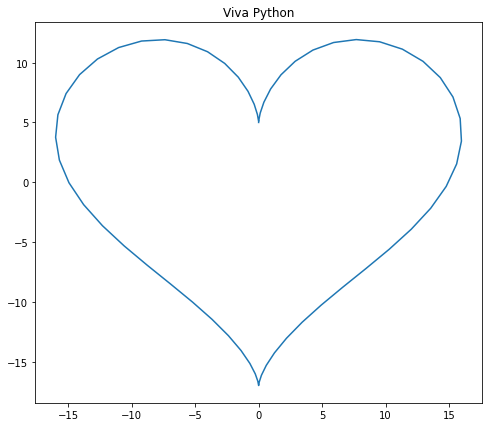

In [3]:
plt.figure(figsize = [8,7])
t = np.arange(0,2*np.pi, 0.1)
x = 16*np.sin(t)**3
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)
plt.plot(x,y)
plt.title("Viva Python")

### Gráficos com 1 figura

In [ ]:
fig = plt.figure()

# Definindo os eixos
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Gráfico de Linha');
plt.show()

### Gráficos com 2 figuras

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # eixos da figura principal
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # eixos da figura secundária

# Figura principal
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Figura Principal')

# Figura secundária
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('Figura Secundária');

### Gráficos em Paralelo

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Título')
    
fig.tight_layout()

### Em Escala

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Escala Padrão")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Escala Logaritmica (y)");

## Truques e Dicas

In [ ]:
# Mudar o tamanho
fig=plt.figure(figsize=(5,8))

X=list(range(10))
Y=[x+(x*random.random()) for x in X]

plt.plot(X,Y)

plt.title('Line Plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

In [ ]:
fig=plt.figure(figsize=(8,3))

plt.plot(X,Y)

plt.title('Line Plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

In [ ]:
# Subplots com tamanhos diferentes
fig=plt.figure(figsize=(8,8))

ax1=plt.subplot2grid((4,4),(0,0),colspan=3)
ax1.plot(X,[x+(x*random.random()) for x in X])
ax1.set_title('Plot 1 : (0,0)')

ax2=plt.subplot2grid((4,4),(0,3))
ax2.plot(X,[x-(x*random.random()) for x in X])
ax2.set_title('Plot 2 : (0,3)')

ax3=plt.subplot2grid((4,4),(1,0),rowspan=3,colspan=3)
ax3.plot(X,[x-(x*random.random()) for x in X])
ax3.set_title('Plot 3 : (1,0)')

ax4=plt.subplot2grid((4,4),(1,3),rowspan=3,colspan=1)
ax4.plot(X,[x+(x*random.random()) for x in X])
ax4.set_title('Plot 4 : (1,3)')

fig.tight_layout()

plt.show()

In [ ]:
# Com anotação
fig=plt.figure(figsize=(6,6))

temp=[ random.uniform(20,40) for i in range(5)]
city=['Cid.A','Cid.B','Cid.C','Cid.D','Cid.E']
y_pos=list(range(1,6))

graph=plt.bar(y_pos, temp,color='violet')

plt.xticks(y_pos,city)
plt.title('Temperatura Média das Cidades')
plt.xlabel('Cidades')
plt.ylabel('Temperatura ($^\circ$C)')

for bar,t in zip(graph,temp):
    plt.text(bar.get_x() + bar.get_width()/2.0,bar.get_height(),'%.2f $^\circ$C'%t,ha='center',va='bottom')

plt.show()

In [ ]:
fig=plt.figure(figsize=(8,6))

plt.plot(X,np.exp(X))

plt.title('Anotação Exponencial com plt.annotate()')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')

# Mudando o limite dos eixos
plt.ylim(1,8000)
plt.xlim(0,9)

# remover os eixos da figura
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# trocar a cor dos eixos
plt.gca().spines['left'].set_color('red')
plt.gca().spines['bottom'].set_color('red')

plt.annotate('Ponto 1',xy=(6,400),arrowprops=dict(arrowstyle='->'),xytext=(4,600))
plt.annotate('Ponto 2',xy=(7,1150),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-.2'),xytext=(4.5,2000))
plt.annotate('Ponto 3',xy=(8,3000),arrowprops=dict(arrowstyle='-|>',connectionstyle='angle,angleA=90,angleB=0'),xytext=(8.3,2200))

plt.show()

In [ ]:
# Agrupar no Gráfico de Barras
temp_summer=[ random.uniform(20,40) for i in range(5)]
temp_winter=[ random.uniform(0,10) for i in range(5)]

fig=plt.figure(figsize=(10,6))

city=['Cid.A','Cid.B','Cid.C','Cid.D','Cid.E']
x_pos_summer=list(range(1,6))
x_pos_winter=[ i+0.4 for i in x_pos_summer]

# Remover os eixos
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

graph_summer=plt.bar(x_pos_summer, temp_summer,color='tomato',label='Verão',width=0.4)
graph_winter=plt.bar(x_pos_winter, temp_winter,color='dodgerblue',label='Inverno',width=0.4)

plt.xticks([i+0.2 for i in x_pos_summer],city)
plt.title('Temperatura Média das Cidades')
plt.ylabel('Temperatura ($^\circ$C)')

# Rotacionar os labels de X
plt.xticks([i+0.2 for i in x_pos_summer],city,fontname='DejaVu Sans',rotation=45,fontsize=14)

# Marca D'água
fig.text(0.85,0.15, 'Análise Prévia',
         fontsize=65, color='gray',
         ha='right', va='bottom', alpha=0.4,rotation=25)

# Imagem de Marca D'água
# import matplotlib.image as img
# av_logo = img.imread(fname='logo.png')
# fig.figimage(av_logo,100,70,alpha=0.3)

# Anotação no Gráfico
for summer_bar,winter_bar,ts,tw in zip(graph_summer,graph_winter,temp_summer,temp_winter):
    plt.text(summer_bar.get_x() + summer_bar.get_width()/2.0,summer_bar.get_height(),'%.2f$^\circ$C'%ts,ha='center',va='bottom')
    plt.text(winter_bar.get_x() + winter_bar.get_width()/2.0,winter_bar.get_height(),'%.2f$^\circ$C'%tw,ha='center',va='bottom')
    
# Modificar a Legenda
plt.legend(loc='upper center',ncol=2,frameon=False)     

plt.legend()  
plt.show()

## Bokeh

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

products=['computer','mobile','printer']
months=['Jan','Feb','Mar']
sales={
    'products':products,
    'Jan':[10,40,5],
    'Feb':[8,45,10],
    'Mar':[25,60,22]
}

cols=['red','green','blue']#,'navy', 'cyan']
fig=figure(x_range=products, plot_width=300, plot_height=300)
fig.vbar_stack(months, x='products', source=sales, color=cols,width=0.5)

show(fig)

In [ ]:
from bokeh.models import ColumnDataSource, FactorRange, HoverTool

LOCATIONS = ['CPC','OG2','HS82-83','IG6','IG4','IG10']
CHECKS = ['AID CHECKS', 'ITEMS SCREENED', 'PERSONS SCREENED']

data = {'LOCATIONS' : LOCATIONS,
        'AID CHECKS'   : [208,622,140,1842,127,1304],
        'PERSONS SCREENED'   : [201,484,126,1073,81,676],
        'ITEMS SCREENED' : [28,71,31,394,32,207]}

x = [ (location, check) for location in LOCATIONS for check in CHECKS ]
counts = sum(zip(data['AID CHECKS'], data['PERSONS SCREENED'], data['ITEMS SCREENED']), ()) # like an hstack

print(x)

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=600, plot_width=990, title="NPS Locations by Security Checks",
           tools="pan,wheel_zoom,box_zoom,reset, save")

p.xaxis.axis_label_text_font_size = "5pt"
p.xaxis.axis_label_text_font_style='bold'

p.vbar(x='x', top='counts', width=0.9, source=source)

p.add_tools(HoverTool(tooltips=[("LOCATION", "@x"), ("TOTAL", "@counts")]))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [ ]:
from bokeh.charts import Bar, show
from bokeh.models import HoverTool

data = {'ID': [0, 1, 2], 'Total': [2, 13, 5], 'Desc': ['a', 'b', 'c']}
p = Bar(data, label='ID', values='Total', width=400, tools='hover')
hover = p.select(dict(type=HoverTool))
hover.tooltips = [('Value of ID',' @ID'),('Value of Desc',' @Desc')]